In [1]:
import torch
from utilities import *
from generate_model import *
from prepare_data import *
from time import time

In [2]:
_, _, test_loader = prep(1)

eye state 0


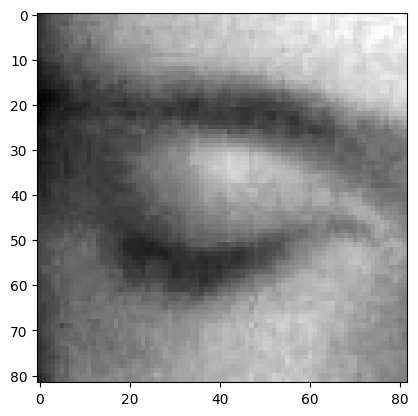

In [3]:
rand = np.random.randint(1000)

for idx, data in enumerate(test_loader):
    image = data[0]
    label = data[0]

    img = data[0].squeeze().numpy()
    label = data[1].item()

    if idx == rand:
        print("eye state", label)
        plt.figure()
        plt.imshow(img, cmap = 'gray')  
        plt.show()
        break

In [4]:
mobile_net = gen_mobile_net(False).to('cpu')
mobile_net.load_state_dict(torch.load(r'mobile_net_saves\2\best_model.pth'))
mobile_net.eval()
stime = time()
op = mobile_net(image)
ftime = time()
pred = torch.argmax(op).item()
print("mobile net prediction: ", pred, ' | time taken: ', str(ftime - stime))

mobile net prediction:  0  | time taken:  0.04923701286315918


In [5]:
squeeze_net = gen_squeeze_net(False).to('cpu')
squeeze_net.load_state_dict(torch.load(r'squeeze_net_saves\1\best_model.pth'))
squeeze_net.eval()
stime = time()
op = squeeze_net(image)
ftime = time()
pred = torch.argmax(op).item()
print("squeeze net prediction: ", pred, ' | time taken: ', str(ftime - stime))

squeeze net prediction:  0  | time taken:  0.016906023025512695


## After warmup

In [6]:
mobile_net = gen_mobile_net(False).to('cpu')
mobile_net.load_state_dict(torch.load(r'mobile_net_saves\2\best_model.pth'))
mobile_net.eval()
warmup(mobile_net)
stime = time()
op = mobile_net(image)
ftime = time()
pred = torch.argmax(op).item()
print("mobile net prediction: ", pred, ' | time taken: ', str(ftime - stime))

warming up
warmup done
mobile net prediction:  0  | time taken:  0.020469188690185547


In [7]:
squeeze_net = gen_squeeze_net(False).to('cpu')
squeeze_net.load_state_dict(torch.load(r'squeeze_net_saves\1\best_model.pth'))
squeeze_net.eval()
warmup(squeeze_net)
stime = time()
op = squeeze_net(image)
ftime = time()
pred = torch.argmax(op).item()
print("squeeze net prediction: ", pred, ' | time taken: ', str(ftime - stime))

warming up
warmup done
squeeze net prediction:  0  | time taken:  0.005000114440917969
